# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [62]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [7]:
fitbit=pd.read_csv('../data/fitbit2.csv', encoding = 'latin1')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [18]:
# AVERAGE STEPS BY MONTH_ENCODED
fitbit.groupby('Months_encoded').median().Steps

Months_encoded
1     10366.0
2      9235.0
3     11122.0
4     13846.5
5     11998.0
6     12935.5
7     10644.0
8     12213.0
9      9343.0
10     7865.0
11     9453.5
12     8531.0
Name: Steps, dtype: float64

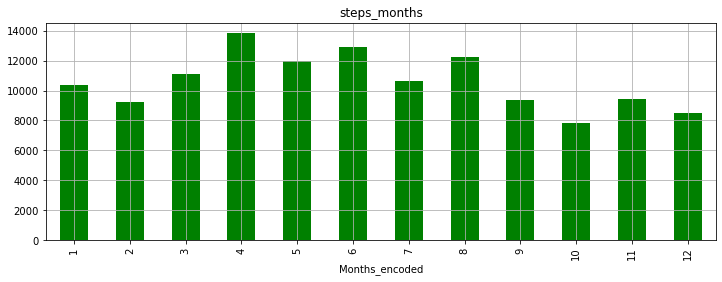

In [33]:
steps_months=fitbit.groupby('Months_encoded').median().Steps.plot(
        
        kind='bar',
        color=['g'],
        grid=True,
        figsize=(12, 4),
        title='steps_months'
)

ax.set_xlabel('months_encoded')
ax.set_ylabel('# median')

plt.savefig('./figures/steps_months.jpg')
plt.show();

In [34]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
fitbit.groupby('Work_or_Weekend').median().Steps

Work_or_Weekend
0     9998.0
1    10445.5
Name: Steps, dtype: float64

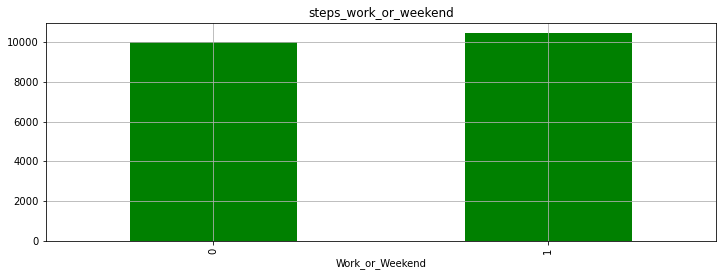

In [35]:
steps_week=fitbit.groupby('Work_or_Weekend').median().Steps.plot(
        
        kind='bar',
        color=['g'],
        grid=True,
        figsize=(12, 4),
        title='steps_work_or_weekend'
)

ax.set_xlabel('Work_or_Weekend')
ax.set_ylabel('# median')

plt.savefig('./figures/steps_work_or_weekend.jpg')
plt.show();

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

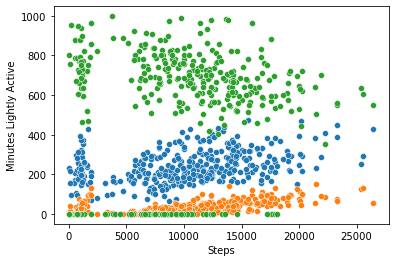

In [45]:
import seaborn as sns

activities=['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']

for activity in activities:

    sns.scatterplot(data=fitbit, x='Steps', y=activity)
    

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [47]:
titanic=pd.read_csv('../data/titanic.csv', encoding = 'latin1')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [48]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [54]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=np.number).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [57]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include='object').head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [64]:
import matplotlib as mp
mp.style.use('classic')
mp.figsize=(12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

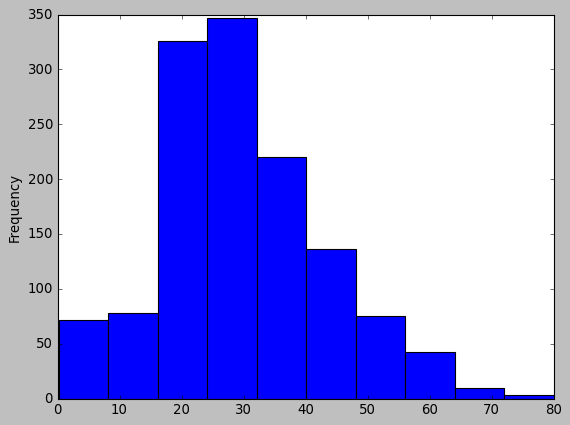

In [66]:
titanic['Age'].plot.hist();

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

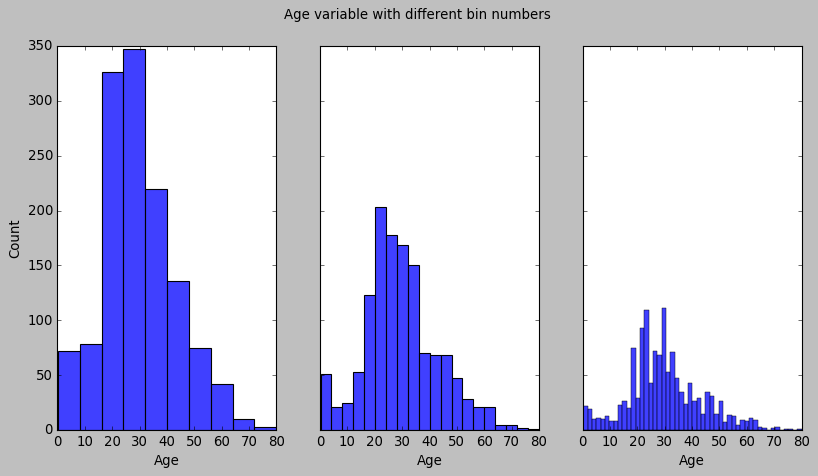

In [85]:
fig, axes = plt.subplots(1,3, figsize=(12, 6), sharey=True)
fig.suptitle('Age variable with different bin numbers')

lista_bins=[10,20,50]

for i,e in enumerate(lista_bins):
    
    sns.histplot(ax=axes[i], data=titanic['Age'], bins=e);

#### How does the bin size affect your plot?

In [ ]:
"""
Cuanto menor es el numero de bins, mayor cantidad de gente
"""

#### Use seaborn to show the distribution of column `Age`.

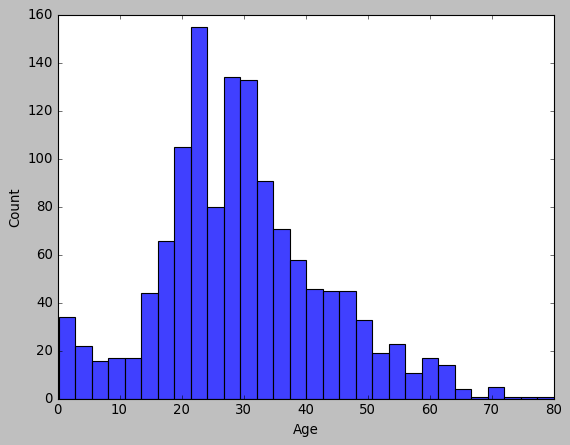

In [90]:
sns.histplot(x=titanic['Age']);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

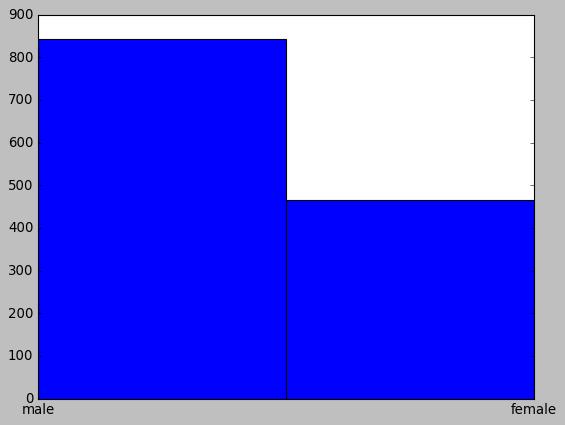

In [95]:
# Method 1 - matplotlib
plt.hist(titanic['Gender'], bins=2);

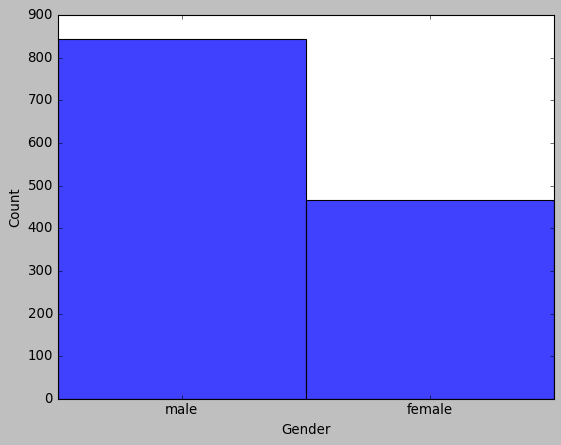

In [91]:
# Method 2 - seaborn
sns.histplot(x=titanic['Gender']);

#### Use the right plot to visualize the column `Pclass`.

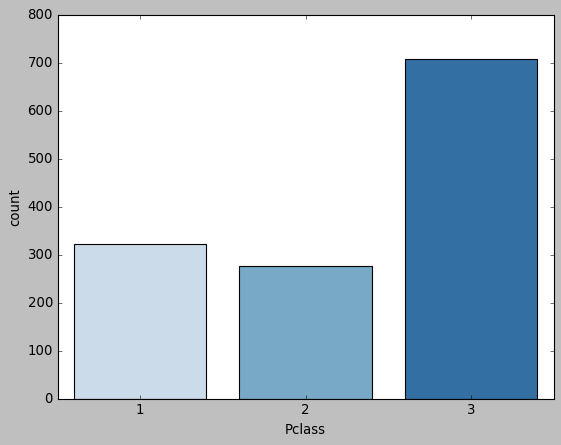

In [103]:
sns.countplot(x=titanic.Pclass, palette='Blues');

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

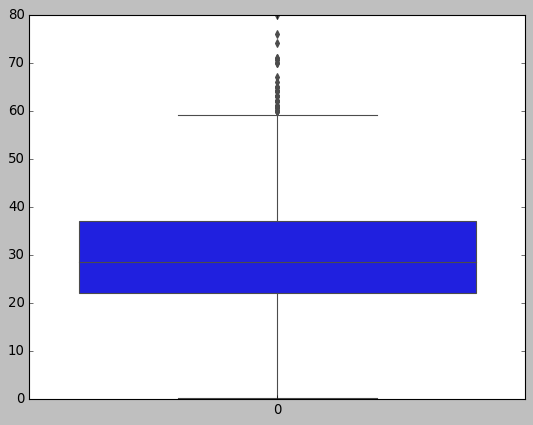

In [108]:
sns.boxplot(data=titanic.Age);

In [ ]:
"""
Con el boxplot podemos ver la medina, outliers, IQR, Q...
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Que la mayor parte pertenecen al rango entro 20 y 40. 
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

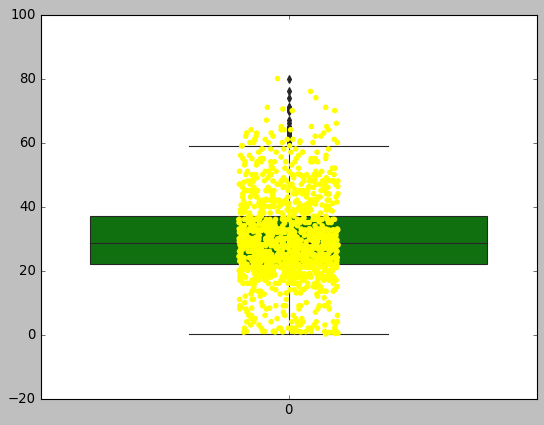

In [115]:
sns.boxplot(data=titanic.Age, color='Green')
sns.stripplot(data=titanic.Age, color='Yellow');

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Indica como estan distribuidos los datos
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

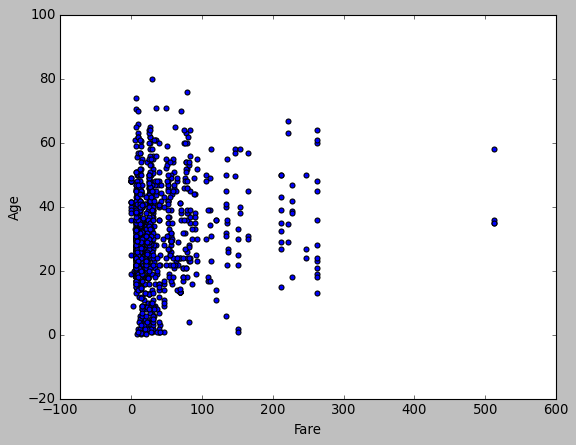

In [124]:
# Method 1 - matplotlib
titanic.plot.scatter(x='Fare', y='Age');

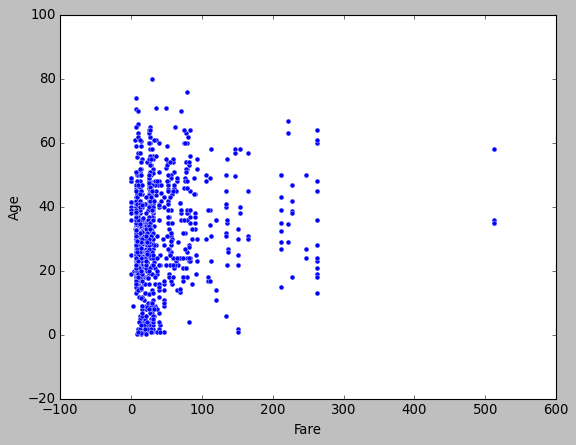

In [125]:
# Method 2 - seaborn
sns.scatterplot(data=titanic, x='Fare', y='Age');

#### Plot the correlation matrix using seaborn.

In [128]:
corr=titanic.corr(method='pearson')
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


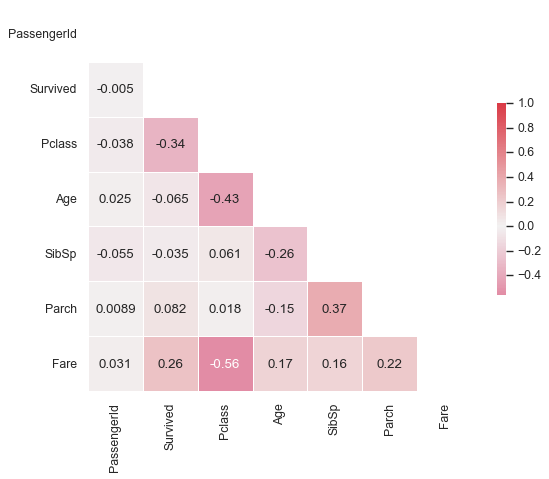

In [132]:
sns.set(style='white')    


mascara=np.triu(np.ones_like(corr, dtype=bool))   


cmap=sns.diverging_palette(0, 10, as_cmap=True)   


sns.heatmap(corr,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 0.5},
            annot=True);

#### What are the most correlated features?

In [ ]:
"""
La mayor correlacion es Pclass y Fare
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.